# Finding Contours with OpenCV

This notebook demonstrates how to use OpenCV to find contours in an image, label each contour with a number at its centroid, and visualize the results.

In [2]:

# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
    

### Load and Preprocess the Image

Text(0.5, 1.0, 'Grayscale Image')

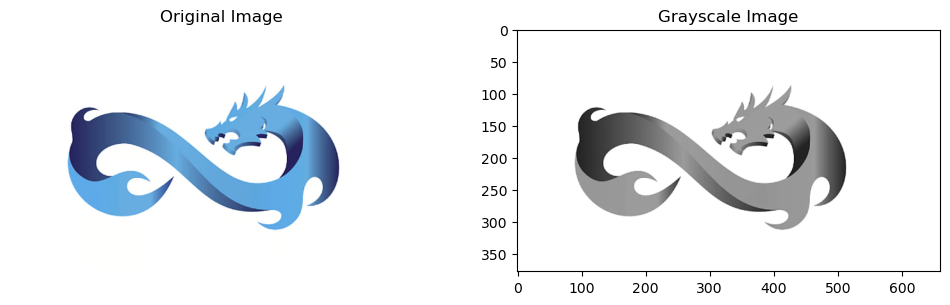

In [3]:

# Load the image
image = cv2.imread('./images/dragon.png', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# display the image and gray image
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')


(-0.5, 659.5, 376.5, -0.5)

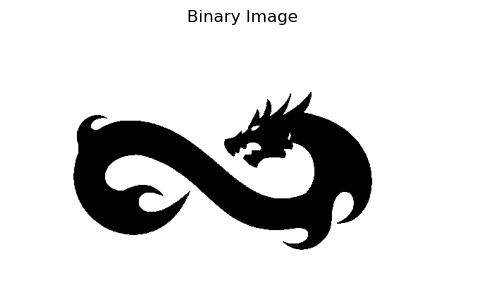

In [4]:

# Apply thresholding
_, binary = cv2.threshold(gray, 200 ,255, cv2.THRESH_BINARY)
    
# display binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')


### Find Contours and Draw Labels

In [5]:

# Find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# print the number of contours found
print('Number of contours found =', len(contours))

Number of contours found = 4


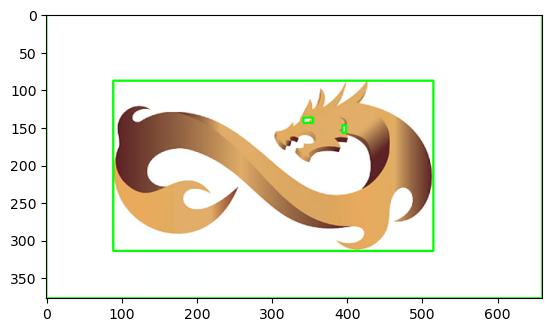

In [ ]:
image_rgb_copy1 = image.copy()

contours,hierarchy = cv2.findContours(binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# loop through contours
for index in range(len(contours)):
    # take contour
    cnt=contours[index]
    # find coordinates
    x,y,w,h = cv2.boundingRect(cnt)
    # draw rectangle to original image
    cv2.rectangle(image_rgb_copy1,(x,y),(x+w,y+h),(0,255,0),2)

# show image
plt.imshow(image_rgb_copy1)

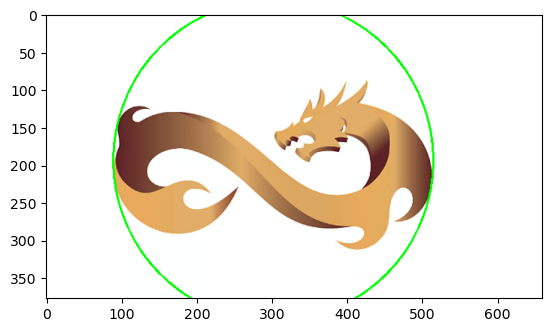

In [18]:
image_rgb_copy2 = image.copy()

contours,hierarchy = cv2.findContours(binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contour = contours[1]

(x,y),radius = cv2.minEnclosingCircle(contour)
center = (int(x),int(y))
radius = int(radius)

cv2.circle(image_rgb_copy2,center,radius,(0,255,0),2);

# draw circle to original image
plt.imshow(image_rgb_copy2)

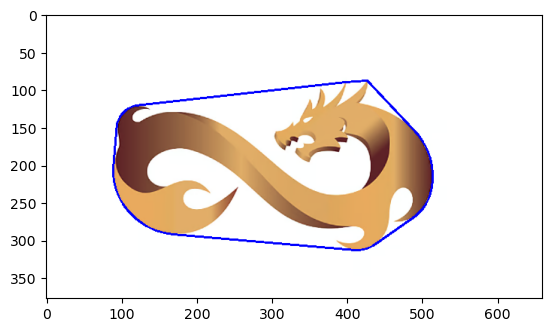

In [16]:
image_rgb_copy3 = image.copy()

contours,hierarchy = cv2.findContours(binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Get the first contour from the list
contour = contours[1]

# Compute the convex hull of the contour
hull = cv2.convexHull(contour)

# draw convexHull to original image
cv2.drawContours(image_rgb_copy3, [hull], 0, (0, 0, 255), 2)     


# draw circle to original image
plt.imshow(image_rgb_copy3)